In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
# # Import data
# df = pd.read_csv('training_project2.csv')

# # Drop date variable
# df = df.drop(columns=['open', 'high', 'low', 'close', 'volume', 'dividend', 'split'])

# # Checking dataset
# # print(df[df['id'] == 11477]['id'])

# # Split data by IDs and write to different files
# dfs = dict(tuple(df.groupby('id')))
# list_df = [dfs[x] for x in dfs]
# for index, df in enumerate(list_df):
#     df['moving_average'] = df['adjusted_close'].rolling(5).mean()
#     df.to_csv("data_by_id/" + str(index) + ".csv", index=False)

In [197]:
# import id 0, given data
dataset = pd.read_csv('data_by_id/0.csv',index_col="time",parse_dates=True)
# df = pd.read_csv('data_by_id/0.csv', index_col="time",parse_dates=True)
n = dataset['adjusted_close'].count()
dataset = dataset.iloc[:n-4,] # for some reason the last 4 are cut off of the factor, so subset by 4 here to match size

# import id 0, factor variable
# df = pd.read_csv('0.csv',index_col="time",parse_dates=True)
# df.tail(8)
dataset.tail(8)

,adjusted_open,adjusted_high,adjusted_low,adjusted_close,adjusted_volume,id,moving_average
time,,,,,,,
2017-12-13,66.764149,67.191169,66.178237,66.217960,1684618.0,0,66.501978
2017-12-14,66.466227,66.625119,65.910108,66.049138,1774564.0,0,66.462255
2017-12-15,66.416574,67.389783,66.227890,67.141516,2871893.0,0,66.507936
2017-12-18,67.767150,68.035279,67.012416,67.191169,2306264.0,0,66.639022
2017-12-19,67.240823,67.578467,67.022347,67.280545,1448362.0,0,66.776066
2017-12-20,67.568536,67.667843,66.694634,66.932971,1363529.0,0,66.919068
2017-12-21,67.111723,67.399714,66.801786,67.052139,1502218.0,0,67.119668
2017-12-22,66.992555,67.071901,66.396712,66.883317,1221315.0,0,67.068028


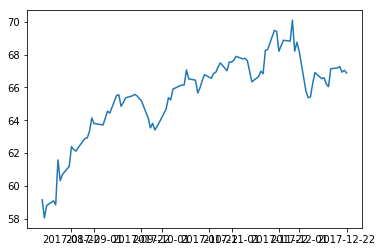

In [179]:
just_the_close = dataset['adjusted_close']
just_the_close = pd.DataFrame(just_the_close)
plt.plot(just_the_close[n-100:])
plt.show()

In [180]:
n = dataset['adjusted_close'].count()

print(n)

n2 = df.count()
print(n2)

4553
factor_analyzed    4553
dtype: int64


In [181]:
#training_set=dataset['factor_analyzed']
#training_set=pd.DataFrame(training_set)
#training=df['adjusted_open']
#training=pd.DataFrame(training)
# Feature Scaling
#sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set)
#training_scaled=sc.fit_transform(training)

#training_set_scaled.plot(figsize=(16,6))
#training_scaled.plot(figsize=(16,6))

In [182]:
# training_set=dataset['adjusted_close'] # using just the adjusted close actually works best ...
# training_set = df['factor_analyzed'] # try with the factor
training_set = df
training_set=pd.DataFrame(training_set)
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4553 entries, 1999-11-19 to 2017-12-22
Data columns (total 1 columns):
factor_analyzed    4553 non-null float64
dtypes: float64(1)
memory usage: 71.1 KB


In [183]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
just_the_close_scaled = sc.fit_transform(just_the_close)

In [184]:
just_the_close.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4553 entries, 1999-11-19 to 2017-12-22
Data columns (total 1 columns):
adjusted_close    4553 non-null float64
dtypes: float64(1)
memory usage: 71.1 KB


In [237]:
# # Creating a data structure with 60 timesteps and 1 output
# X_train = []
# y_train = []
# for i in range(60, n-100):
#     X_train.append(training_set_scaled[i-60:i, 0])
#     y_train.append(training_set_scaled[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)

# # Reshaping
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# ===== use actual close for y, and factor variable for x
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
R = 60
for i in range(R, n-100):
    X_train.append(training_set_scaled[i-R:i, 0])
    y_train.append(just_the_close_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape
n2 = X_train.shape[0]

In [212]:
# Initialising the RNN
regressor = Sequential()

In [213]:
# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [214]:
regressor.get_layer(index=0).get_config()

{'name': 'lstm_56',
 'trainable': True,
 'batch_input_shape': (None, 60, 1),
 'dtype': 'float32',
 'return_sequences': True,
 'return_state': False,
 'go_backwards': False,
 'stateful': False,
 'unroll': False,
 'units': 50,
 'activation': 'tanh',
 'recurrent_activation': 'hard_sigmoid',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'recurrent_initializer': {'class_name': 'Orthogonal',
  'config': {'gain': 1.0, 'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'unit_forget_bias': True,
 'kernel_regularizer': None,
 'recurrent_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'recurrent_constraint': None,
 'bias_constraint': None,
 'dropout': 0.0,
 'recurrent_dropout': 0.0,
 'implementation': 1}

In [215]:
regressor.get_layer(index=8).get_config()

{'name': 'dense_13',
 'trainable': True,
 'units': 1,
 'activation': 'linear',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [270]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
4397/4397 [==============================] - 26s 6ms/step - loss: 0.0014
Epoch 2/10
4397/4397 [==============================] - 23s 5ms/step - loss: 0.0011
Epoch 3/10
4397/4397 [==============================] - 22s 5ms/step - loss: 9.0796e-04
Epoch 4/10
4397/4397 [==============================] - 22s 5ms/step - loss: 8.1989e-04
Epoch 5/10
4397/4397 [==============================] - 22s 5ms/step - loss: 8.1025e-04
Epoch 6/10
4397/4397 [==============================] - 22s 5ms/step - loss: 8.0397e-04
Epoch 7/10
4397/4397 [==============================] - 22s 5ms/step - loss: 6.8042e-04
Epoch 8/10
4397/4397 [==============================] - 21s 5ms/step - loss: 6.0862e-04
Epoch 9/10
4397/4397 [==============================] - 22s 5ms/step - loss: 6.9638e-04
Epoch 10/10
4397/4397 [==============================] - 22s 5ms/step - loss: 5.9431e-04


In [276]:
X_test = []
X_test_forcasted = []
y_test = []
for i in range(n2-100, n2):
    X_test.append(training_set_scaled[i-60:i, :])
    y_test.append(training_set_scaled[i, :])
    for j in range(5):
        X_test_forcasted = np.array(X_test)
        X_test_forcasted = np.reshape(X_test_forcasted, (X_test_forcasted.shape[0], X_test_forcasted.shape[1], 1))
        y_predicted = regressor.predict(X_test_forcasted)
#         print("X_test shape:", X_test_forcasted.shape)
#         print("Y_predicted shape:", y_predicted.shape)
        y_predicted = np.reshape(y_predicted, (y_predicted.shape[0],1,1))
        X_test_forcasted = np.concatenate((X_test_forcasted[:,1:,:], y_predicted),axis = 1)


In [277]:
y_predicted = np.reshape(y_predicted, (y_predicted.shape[0], y_predicted.shape[1]))
predicted_stock_price=pd.DataFrame(y_predicted)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
0    100 non-null float32
dtypes: float32(1)
memory usage: 480.0 bytes


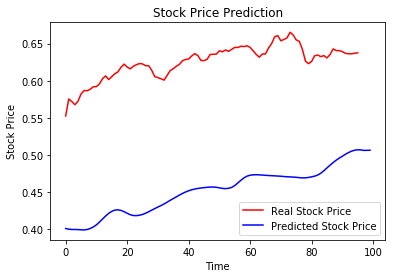

In [278]:
# Visualising the results
plt.plot(training_set_scaled[n-100:], color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [309]:
#### put predicted price and actual price in same df
# time_index = just_the_close.index
time_index = just_the_close.index
predicted_stock_price.index = time_index[n-100-4:]
just_the_close = pd.DataFrame(training_set_scaled).rename(index=str, columns={0: "a"})
just_the_close[n-100-4:].index = time_index[n-100-4:]
together_df = pd.concat((just_the_close[n-100-4:], predicted_stock_price), axis = 1)

# Index([u'adjusted_close', u'factor'],dtype='object')

together_df.rename(index=str, columns={"a": "actual_price", 0: "predicted_price"}, inplace = True)
together_df

# # ERROR
# ### having trouble with the scaling, putting predicted price (using factor) to close-prices
# close_unscaled = sc.inverse_transform(training_set)
# close_unscaled = pd.DataFrame(close_unscaled)
# close_unscaled.rename(index=str, columns={0: "predicted_price"}, inplace = True)
# close_unscaled = close_unscaled[n-100:]
# plt.plot(together_df['adjusted_close'])
# plt.plot(close_unscaled['predicted_price'])
# plt.show()
# close_unscaled.info()
# close_unscaled.tail()

,actual_price,predicted_price
4453,0.556502,0.400723
4454,0.547438,0.399888
4455,0.548358,0.399468
4456,0.554663,0.399397
4457,0.552383,0.399327
4458,0.575378,0.399040
4459,0.571913,0.398854
4460,0.567572,0.399443
4461,0.572173,0.400772
4462,0.582081,0.402796


In [311]:
# make new column with 2% price predictions 5 days in future from time t

together_df.head()
together_df = together_df.assign(actual_lag_5 = lambda x: x.actual_price.shift(-5))
together_df = together_df.assign(predict_lag_5 = lambda x: x.predicted_price.shift(-5))
together_df = together_df.assign(actual_percent = lambda x: (x.actual_lag_5 - x.actual_price)/x.actual_price)
together_df = together_df.assign(predict_percent = lambda x: (x.predict_lag_5 - x.predicted_price)/x.predicted_price)
together_df = together_df.assign(up_two = lambda x: (x.actual_percent > 0.02).astype(int))
together_df = together_df.assign(up_three = lambda x: (x.actual_percent > 0.03).astype(int))
together_df = together_df.assign(up_five = lambda x: (x.actual_percent > 0.05).astype(int))
together_df = together_df.assign(predict_up_two = lambda x: (x.predict_percent > 0.02).astype(int))
together_df = together_df.assign(predict_up_three = lambda x: (x.predict_percent > 0.03).astype(int))
together_df = together_df.assign(predict_up_five = lambda x: (x.predict_percent > 0.05).astype(int))

# print(together_df.iloc[2,'up_two'])

# for t in range(0,n-4):
#     together_df.iloc[t,'up_two'] = t
    
together_df.head(15)

,actual_price,predicted_price,actual_lag_5,predict_lag_5,actual_percent,predict_percent,up_two,up_three,up_five,predict_up_two,predict_up_three,predict_up_five
4453,0.556502,0.400723,0.575378,0.399040,0.033918,-0.004201,1,1,0,0,0,0
4454,0.547438,0.399888,0.571913,0.398854,0.044708,-0.002586,1,1,0,0,0,0
4455,0.548358,0.399468,0.567572,0.399443,0.035039,-0.000063,1,1,0,0,0,0
4456,0.554663,0.399397,0.572173,0.400772,0.031570,0.003443,1,1,0,0,0,0
4457,0.552383,0.399327,0.582081,0.402796,0.053763,0.008687,1,1,1,0,0,0
4458,0.575378,0.399040,0.586745,0.405748,0.019757,0.016812,0,0,0,0,0,0
4459,0.571913,0.398854,0.586424,0.409416,0.025372,0.026482,1,0,0,1,0,0
4460,0.567572,0.399443,0.588520,0.413523,0.036908,0.035249,1,1,0,1,1,0
4461,0.572173,0.400772,0.591803,0.417600,0.034308,0.041989,1,1,0,1,1,0
4462,0.582081,0.402796,0.592025,0.421204,0.017084,0.045701,0,0,0,1,1,0


0.04121985298407876